In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from helper import charts

In [2]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

In [3]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(6,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature], y=df[label], batch_size=batch_size, epochs=epochs)

  return history

In [4]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epoch_count = 50
batch_size = 64

# Specify the feature and the label.
my_feature = ["longitude", "latitude", "total_rooms", "total_bedrooms", "population", "households"]
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Invoke the functions.
my_model = build_model(learning_rate)
history = train_model(my_model, training_df, my_feature, my_label, epoch_count, batch_size)

Epoch 1/50
266/266 [==============================] - 1s 1ms/step - loss: 1979573.6250 - root_mean_squared_error: 1406.9733
Epoch 2/50
266/266 [==============================] - 0s 1ms/step - loss: 219527.8906 - root_mean_squared_error: 468.5380
Epoch 3/50
266/266 [==============================] - 0s 1ms/step - loss: 30644.1758 - root_mean_squared_error: 175.0548
Epoch 4/50
266/266 [==============================] - 0s 932us/step - loss: 23136.8086 - root_mean_squared_error: 152.1079
Epoch 5/50
266/266 [==============================] - 0s 872us/step - loss: 22318.1875 - root_mean_squared_error: 149.3927
Epoch 6/50
266/266 [==============================] - 0s 1ms/step - loss: 21474.9863 - root_mean_squared_error: 146.5435
Epoch 7/50
266/266 [==============================] - 0s 951us/step - loss: 20559.9043 - root_mean_squared_error: 143.3873
Epoch 8/50
266/266 [==============================] - 0s 1ms/step - loss: 19621.8242 - root_mean_squared_error: 140.0779
Epoch 9/50
266/266 [==

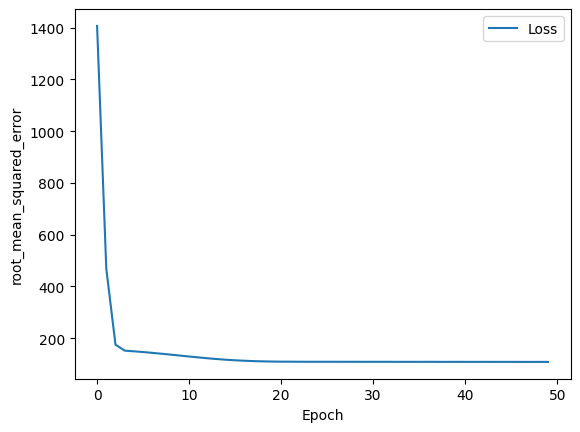

In [5]:
#saving history and epcohs to dataframe
epochs = history.epoch
hist = pd.DataFrame(history.history)
rmse = hist["root_mean_squared_error"]
charts.plot_training_loss(rmse)

In [6]:
#sampling data to test/validate on
sample_df = training_df.sample(n=200, ignore_index=True)
features = sample_df[my_feature]
predictions = my_model.predict(features).ravel()
sample_df["prediction"] = predictions

sample_df.head()

7/7 [==============================] - 0s 1ms/step


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prediction
0,-118.14,33.95,37.0,1462.0,243.0,600.0,236.0,5.2015,302.0,222.167358
1,-117.15,32.76,36.0,2644.0,674.0,1211.0,654.0,3.0445,214.8,232.662872
2,-118.36,34.04,45.0,1767.0,417.0,1052.0,379.0,3.5161,157.0,196.684662
3,-122.04,38.25,37.0,1176.0,291.0,648.0,271.0,2.7167,92.2,209.030090
4,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162.5,118.513573


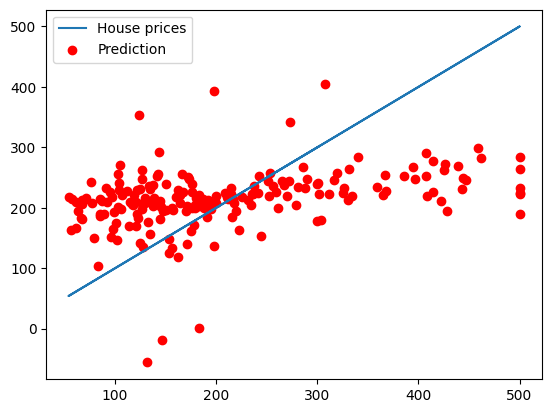

In [7]:
charts.plot_model_accuracy(sample_df, my_label, label="House prices")


In [8]:
#weights per features
weights = pd.DataFrame.from_dict({
    "feature" : my_feature,
    "weight" : my_model.get_weights()[0].ravel(),
    "correlation" : training_df.corr()["median_house_value"].filter(items=my_feature)
})

weights
my_model.get_weights()

[array([[-1.6676067e+00],
        [-2.0321447e-04],
        [ 4.3777093e-02],
        [-3.3759239e-01],
        [-6.8693772e-02],
        [ 3.5377017e-01]], dtype=float32),
 array([0.92252296], dtype=float32)]